In [1]:
import warnings
warnings.filterwarnings("ignore")
import opendatasets as od
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
sns.set_style("dark")
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
start_time = datetime.datetime.now()
print(f'Last notebook run: {start_time}')

Last notebook run: 2024-07-06 18:12:23.011533


## Load dataset

In [2]:
od.download("https://www.kaggle.com/datasets/erogluegemen/airline-passengers")

Skipping, found downloaded files in ".\airline-passengers" (use force=True to force download)


In [3]:
df = pd.read_csv('airline-passengers/airline-passengers.csv')

In [4]:
df

,month,total_passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


## Data exploration and visualization

### For better visualization and data handling transform month column feature into separeted columns

In [5]:
df['date'] = pd.to_datetime(df['month'])
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df.drop('date',axis=1, inplace=True)

In [6]:
df=df[['year','month','total_passengers']]
df.head()

,year,month,total_passengers
0,1949,1,112
1,1949,2,118
2,1949,3,132
3,1949,4,129
4,1949,5,121


### Data study

In [7]:
df.isnull().sum()

year                0
month               0
total_passengers    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   year              144 non-null    int32
 1   month             144 non-null    int32
 2   total_passengers  144 non-null    int64
dtypes: int32(2), int64(1)
memory usage: 2.4 KB


In [9]:
df['year'].value_counts()

year
1949    12
1950    12
1951    12
1952    12
1953    12
1954    12
1955    12
1956    12
1957    12
1958    12
1959    12
1960    12
Name: count, dtype: int64

In [10]:
df['month'].value_counts()

month
1     12
2     12
3     12
4     12
5     12
6     12
7     12
8     12
9     12
10    12
11    12
12    12
Name: count, dtype: int64

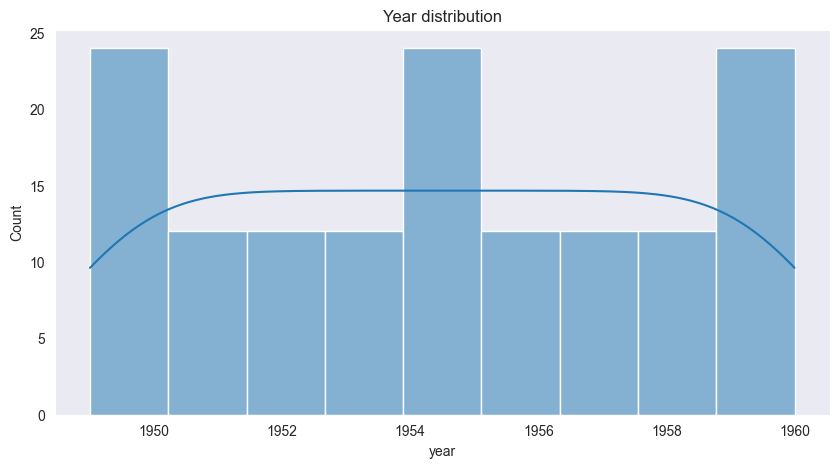

In [11]:
plt.figure(figsize=(10,5))
plt.title('Year distribution')
sns.histplot(df['year'], kde=True)
plt.show()

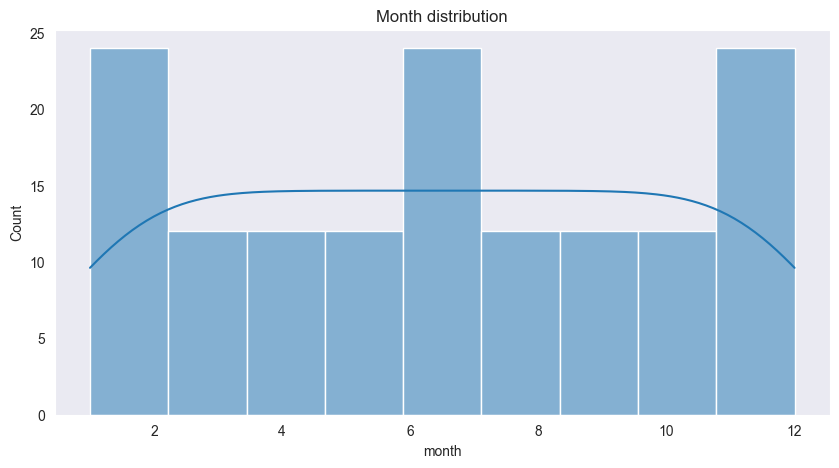

In [12]:
plt.figure(figsize=(10,5))
plt.title('Month distribution')
sns.histplot(df['month'], kde=True)
plt.show()

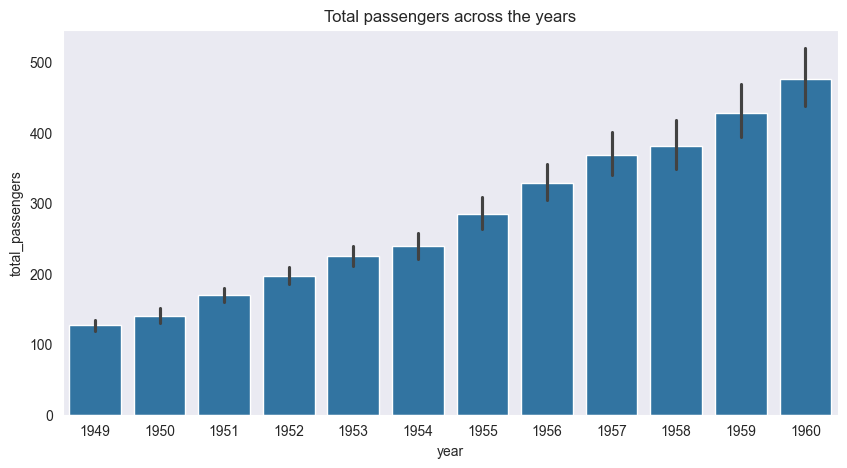

In [13]:
plt.figure(figsize=(10,5))
plt.title('Total passengers across the years')
sns.barplot(x=df.year, y=df.total_passengers)
plt.show()

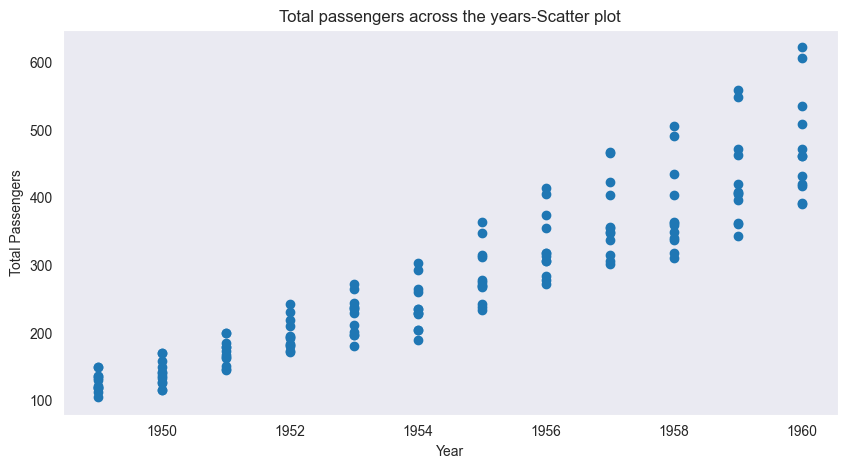

In [14]:
plt.figure(figsize=(10,5))
plt.title('Total passengers across the years-Scatter plot')
plt.scatter(x=df.year, y=df.total_passengers)
plt.xlabel("Year")
plt.ylabel("Total Passengers")
plt.show()

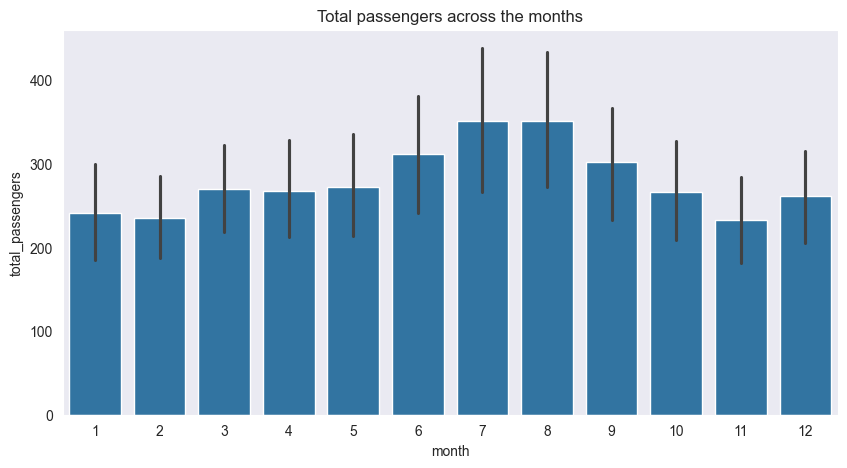

In [15]:
plt.figure(figsize=(10,5))
plt.title('Total passengers across the months')
sns.barplot(x=df.month, y=df.total_passengers)
plt.show()

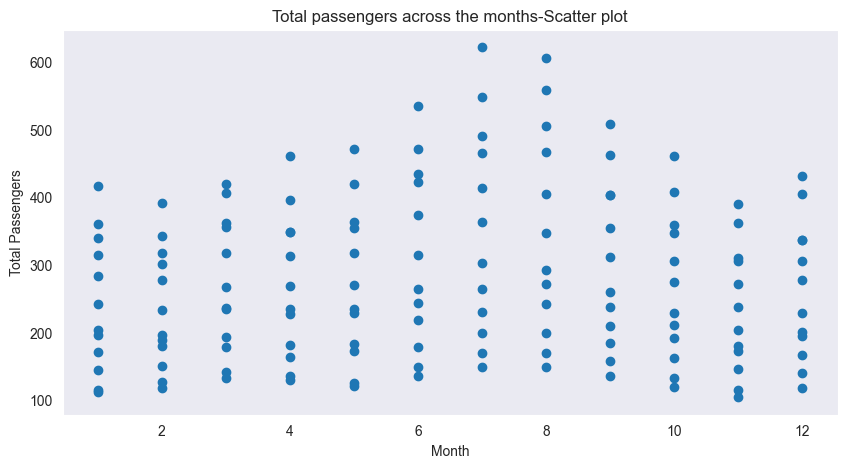

In [16]:
plt.figure(figsize=(10,5))
plt.title('Total passengers across the months-Scatter plot')
plt.scatter(x=df.month, y=df.total_passengers)
plt.xlabel("Month")
plt.ylabel("Total Passengers")
plt.show()

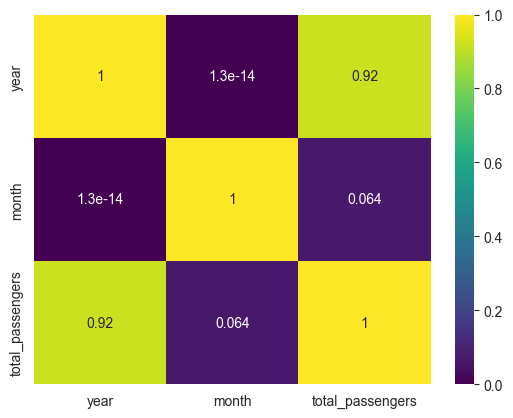

In [17]:
plt.figure()
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

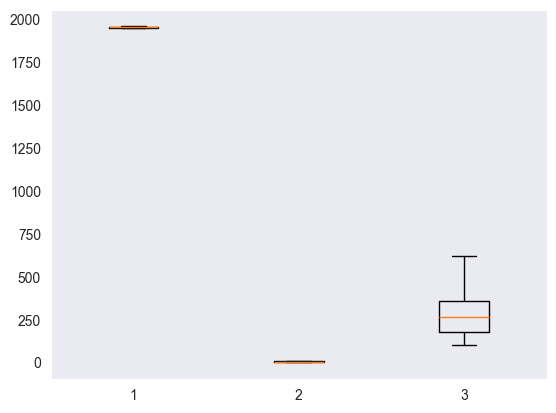

In [18]:
plt.boxplot(df)
plt.show()

## Splitting data into independent features and dependent feature

In [19]:
X = df.drop('total_passengers',axis=1) # independent features for multi linear regression
y = df['total_passengers'] # dependent feature
X_simple = df.drop(['total_passengers','month'],axis=1) # independent features for simple linear regression

## Train test split for multi linear regression

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

## Train test split for simple linear regression

In [21]:
X_train_simple,X_test_simple,y_train_simple,y_test_simple = train_test_split(X_simple,y,test_size=0.2,shuffle=True,random_state=42)

# Scalling/standardize data

In [22]:
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train) # fit transform on train data
X_test_scaled = scaler.fit_transform(X_test) # only transform on test data, dont want data leakage

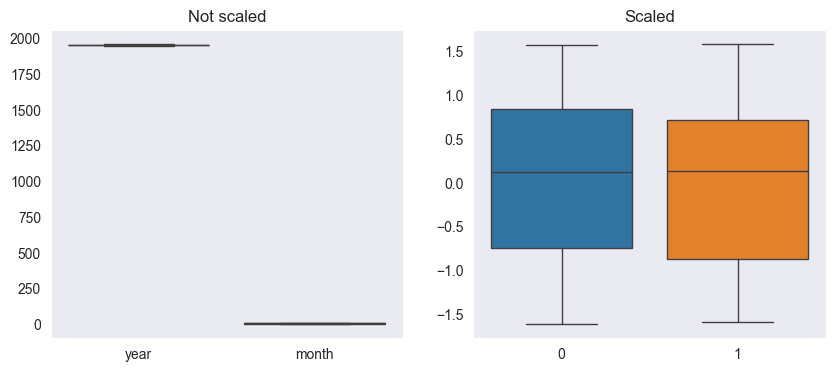

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Not scaled')
sns.boxplot(X_train)
plt.subplot(1,2,2)
plt.title('Scaled')
sns.boxplot(X_train_scaled)
plt.show()

## Running some experiments

In [25]:
def evaluate_model(y_test, y_pred, X_test):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    score = r2_score(y_test, y_pred)
    adjusted_r2  = 1-((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
    return mae,mse,rmse,score,adjusted_r2

### Multi Linear Regression (2 input features)

In [26]:
linreg = LinearRegression().fit(X_train_scaled,y_train)

In [27]:
y_pred = linreg.predict(X_test_scaled)

In [28]:
linreg_mae,linreg_mse,linreg_rmse,linreg_score,linreg_adjusted_r2 = evaluate_model(y_test,y_pred,X_test_scaled)

In [29]:
print(f"""
    MAE:{linreg_mae:.2f}
    MSE:{linreg_mse:.2f}
    RMSE:{linreg_rmse:.2f}
    R2 Score:{linreg_score:.2f}
    Adjusted R2:{linreg_adjusted_r2:.2f}
""")


    MAE:36.06
    MSE:2006.54
    RMSE:44.79
    R2 Score:0.80
    Adjusted R2:0.78



## RandomForestRegressor (2 input features)

In [30]:
randomForestRegressor = RandomForestRegressor().fit(X_train_scaled, y_train)

In [31]:
y_pred_regressor = randomForestRegressor.predict(X_test_scaled)

In [32]:
regressor_mae,regressor_mse,regressor_rmse,regressor_score,regressor_adjusted_r2 = evaluate_model(y_test,
                                                                                                  y_pred_regressor,
                                                                                                  X_test_scaled)

In [33]:
print(f"""
    MAE:{regressor_mae:.2f}
    MSE:{regressor_mse:.2f}
    RMSE:{regressor_rmse:.2f}
    R2 Score:{regressor_score:.2f}
    Adjusted R2:{regressor_adjusted_r2:.2f}
""")


    MAE:14.89
    MSE:365.75
    RMSE:19.12
    R2 Score:0.96
    Adjusted R2:0.96



## Predicting total passengers for month 6 and year 1980

In [34]:
new_input = np.array([[1980,6]])
new_input = scaler.transform(new_input)

In [35]:
randomForestRegressor.predict(new_input)

array([552.31])

# Plotting results

In [36]:
results_df = pd.DataFrame({'LinearRegression':
              {'R2 Score':linreg_score,'Adjusted R2 Score':linreg_adjusted_r2},
              'RandomForestRegressor':
              {'R2 Score':regressor_score,'Adjusted R2 Score':regressor_adjusted_r2}
             }).transpose()
results_df

,R2 Score,Adjusted R2 Score
LinearRegression,0.798080,0.782548
RandomForestRegressor,0.963194,0.960363


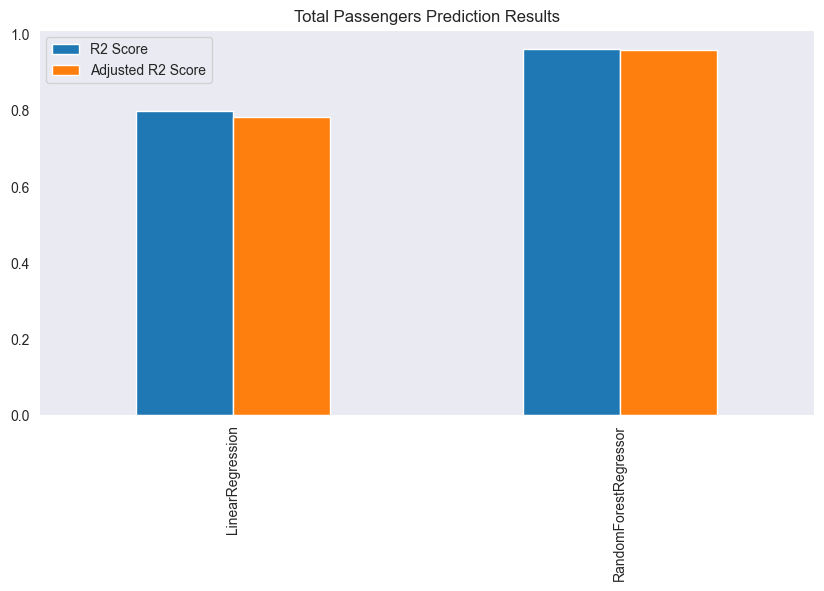

In [37]:
results_df.plot(figsize=(10,5),kind='bar', title='Total Passengers Prediction Results');

In [38]:
end_time = datetime.datetime.now()
print(f'Total runtime:{end_time-start_time}')

Total runtime:0:00:02.539637
